In [3]:
# Setting up the Envrionment.
!pip install pandas numpy matplotlib seaborn yfinance scipy statsmodels scikit-learn



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
# Installing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from scipy.stats import pearsonr
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler


In [47]:
# Fetching Financial Data from Yahoo Finance
# Retrieving Meta Inc.'s historical stock price and financial statements.

# Defining the company ticker
meta_ticker = "META"

# Download stock price data (last 5 years)
meta_stock = yf.download(meta_ticker, start="2021-01-01", end="2025-01-01")

# Download financial statements
meta_info = yf.Ticker(meta_ticker)
meta_balance_sheet = meta_info.balance_sheet
meta_income_statement = meta_info.financials
meta_cashflow = meta_info.cashflow


[*********************100%***********************]  1 of 1 completed


In [8]:
# Data Preprocessing
# Clean and structure the stock price data and financial statements.

# Handling missing values
meta_stock.fillna(method='ffill', inplace=True)

# Transpose financial statements for readability
balance_sheet = meta_balance_sheet.T
income_statement = meta_income_statement.T
cashflow_statement = meta_cashflow.T

# Convert currency values into billions for better readability
balance_sheet = balance_sheet / 1e9
income_statement = income_statement / 1e9
cashflow_statement = cashflow_statement / 1e9

# Display sample cleaned data
print(balance_sheet.head())
print(income_statement.head())
print(cashflow_statement.head())


           Treasury Shares Number Ordinary Shares Number Share Issued  \
2024-12-31                    NaN               2.534488     2.534488   
2023-12-31                    0.0                  2.561        2.561   
2022-12-31                    NaN                  2.614        2.614   
2021-12-31                    NaN                  2.741        2.741   
2020-12-31                    NaN                    NaN          NaN   

           Total Debt Tangible Book Value Invested Capital Working Capital  \
2024-12-31      49.06             161.068          211.463          66.449   
2023-12-31     37.234             131.726          171.553          53.405   
2022-12-31     26.591              104.51          135.636          32.523   
2021-12-31     13.873             105.048          124.879          45.531   
2020-12-31        NaN                 NaN              NaN             NaN   

           Net Tangible Assets Capital Lease Obligations Common Stock Equity  \
2024-12-31  

C:\Users\Naomie  Fillies\AppData\Local\Temp\ipykernel_13712\2050180880.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  meta_stock.fillna(method='ffill', inplace=True)


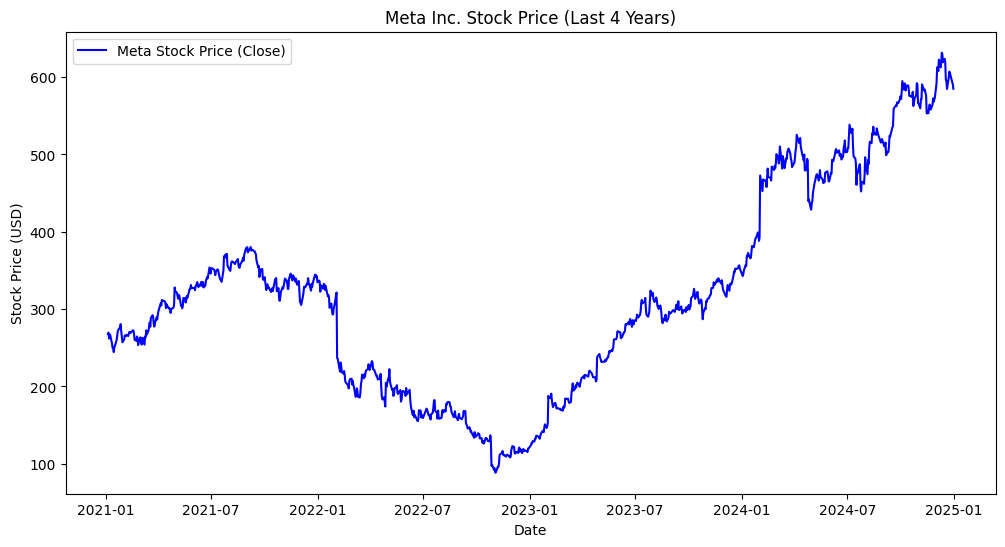

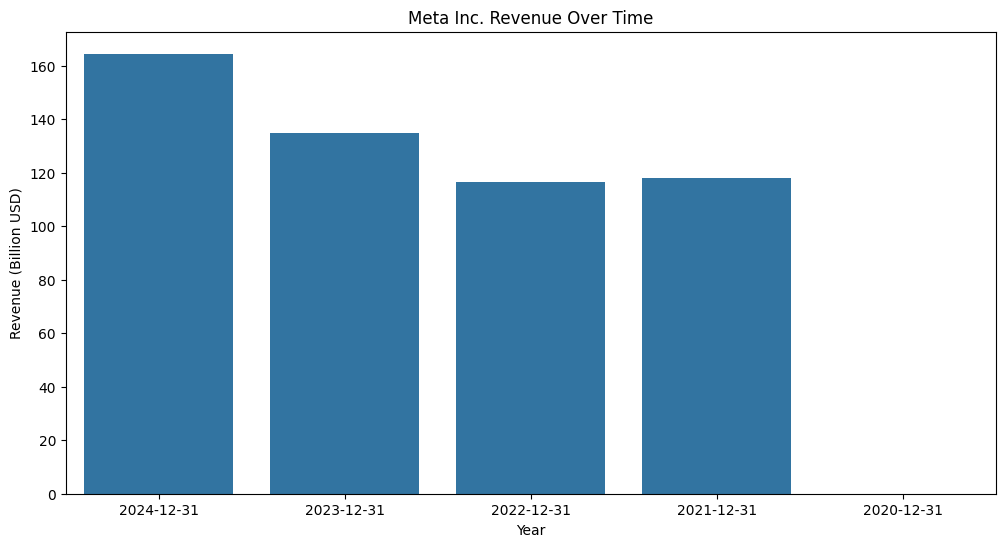

In [48]:
# Exploratory Data Analysis (EDA)
# Visualize trends in stock price movements and revenue growth.

# Stock Price Analysis
plt.figure(figsize=(12, 6))
plt.plot(meta_stock['Close'], color='blue', label="Meta Stock Price (Close)")
plt.title("Meta Inc. Stock Price (Last 4 Years)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()

# Revenue Growth Visualization
plt.figure(figsize=(12, 6))
# Replace the following the following due to ecountered errors:
#sns.barplot(x=income_statement.index, y=income_statement.loc["Total Revenue"]), with:
sns.barplot(x=income_statement.index, y=income_statement["Total Revenue"])
plt.title("Meta Inc. Revenue Over Time")
plt.xlabel("Year")
plt.ylabel("Revenue (Billion USD)")
plt.show()


In [11]:
# The error related to 'Total Revenue' suggests that the key "Total Revenue" is missing or incorrectly referenced in the income_statement DataFrame. Let's troubleshoot step by step.

# Possible Causes & Solutions:

# 1. Confirm Column Names in income_statement

# Before using "Total Revenue", verify that it actually exists in the DataFrame.
print(income_statement.index)  # Check available index values



DatetimeIndex(['2024-12-31', '2023-12-31', '2022-12-31', '2021-12-31',
               '2020-12-31'],
              dtype='datetime64[ns]', freq=None)


In [12]:
print(income_statement.head())

           Tax Effect Of Unusual Items Tax Rate For Calcs Normalized EBITDA  \
2024-12-31                    -0.08142                0.0            87.566   
2023-12-31                   -0.064416                0.0            59.418   
2022-12-31                   -0.015795                0.0            37.771   
2021-12-31                    -0.02338                0.0            55.414   
2020-12-31                         NaN                NaN               NaN   

           Total Unusual Items Total Unusual Items Excluding Goodwill  \
2024-12-31               -0.69                                  -0.69   
2023-12-31              -0.366                                 -0.366   
2022-12-31              -0.081                                 -0.081   
2021-12-31               -0.14                                  -0.14   
2020-12-31                 NaN                                    NaN   

           Net Income From Continuing Operation Net Minority Interest  \
2024-12-31   

In [20]:
# This tells us that the index of income_statement is made up of dates, specifically end-of-year financial reports for Meta Inc.

In [21]:
print(income_statement.columns)  # Check available column names


Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Net Income', 'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 'Gai

In [13]:
print(income_statement.keys())  # Show valid column names


Index(['Tax Effect Of Unusual Items', 'Tax Rate For Calcs',
       'Normalized EBITDA', 'Total Unusual Items',
       'Total Unusual Items Excluding Goodwill',
       'Net Income From Continuing Operation Net Minority Interest',
       'Reconciled Depreciation', 'Reconciled Cost Of Revenue', 'EBITDA',
       'EBIT', 'Net Interest Income', 'Interest Expense', 'Interest Income',
       'Normalized Income',
       'Net Income From Continuing And Discontinued Operation',
       'Total Expenses', 'Total Operating Income As Reported',
       'Diluted Average Shares', 'Basic Average Shares', 'Diluted EPS',
       'Basic EPS', 'Diluted NI Availto Com Stockholders',
       'Net Income Common Stockholders', 'Otherunder Preferred Stock Dividend',
       'Net Income', 'Net Income Including Noncontrolling Interests',
       'Net Income Continuous Operations', 'Tax Provision', 'Pretax Income',
       'Other Income Expense', 'Other Non Operating Income Expenses',
       'Special Income Charges', 'Gai

In [38]:
# Financial Ratio Calculation
# Calculate and analyze key financial health indicators.

# Calculate Profit Margin
profit_margin = income_statement["Net Income"] / income_statement["Total Revenue"]

# Debt-to-Equity Ratio
# Replace this line since these column names does not exist:
# debt_equity_ratio = balance_sheet.loc["Total Liabilities"] / balance_sheet.loc["Stockholders Equity"]; with
debt_equity_ratio = balance_sheet["Total Liabilities Net Minority Interest"] / balance_sheet["Stockholders Equity"]


# Return on Equity (ROE)
roe = income_statement["Net Income"] / balance_sheet["Stockholders Equity"]

# Print financial ratios
financial_ratios = pd.DataFrame({
    "Profit Margin": profit_margin,
    "Debt-to-Equity Ratio": debt_equity_ratio,
    "Return on Equity": roe
})
print(financial_ratios)


           Profit Margin Debt-to-Equity Ratio Return on Equity
2024-12-31      0.379086              0.51149         0.341442
2023-12-31      0.289825             0.499158         0.255262
2022-12-31      0.198955             0.477389         0.184547
2021-12-31      0.333845             0.329183         0.315265
2020-12-31           NaN                  NaN              NaN


In [33]:
print(balance_sheet.columns)

Index(['Treasury Shares Number', 'Ordinary Shares Number', 'Share Issued',
       'Total Debt', 'Tangible Book Value', 'Invested Capital',
       'Working Capital', 'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Stockholders Equity',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Tradeand Other Payables Non Current',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long Term Debt',
       'Current Liabilities', 'Other Current Liabilities',
       'Current Deferred Liabilities', 'Current Deferred Revenue',
       'Current Debt And Capital Lease Oblig

In [35]:
print(balance_sheet.get('Total Liailities')) # Instead of scanning column names individually

None


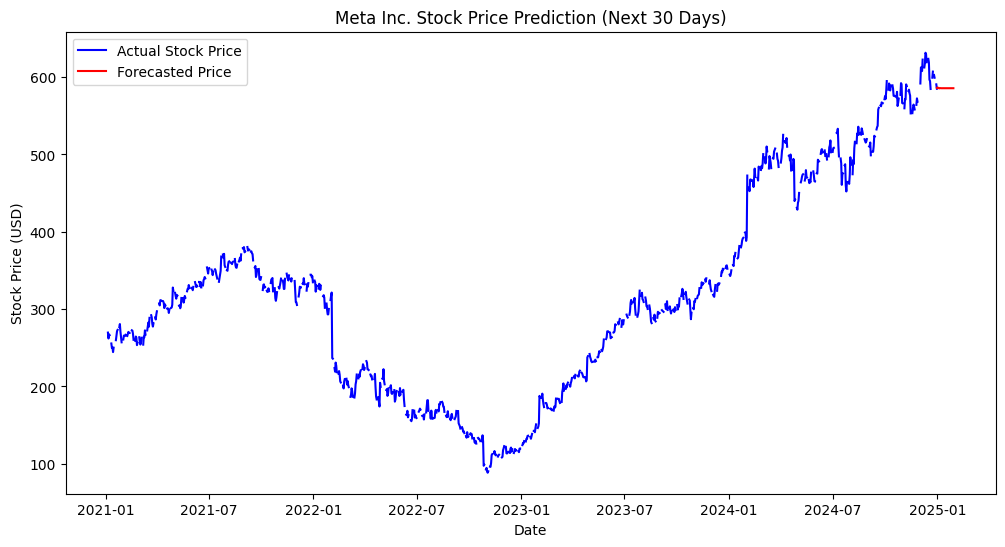

In [49]:
# Time-Series Forecasting
# Predict future stock prices using an ARIMA model.

# Prepare dataset for modeling
meta_stock['Returns'] = meta_stock['Close'].pct_change()
meta_stock.dropna(inplace=True)

# Include the additional 2 lines of code
meta_stock.index = pd.to_datetime(meta_stock.index)  # Convert index to datetime format
meta_stock = meta_stock.asfreq('D')  # Set frequency to daily

# Fit ARIMA model for forecasting
model = ARIMA(meta_stock['Close'], order=(5,1,0))
meta_forecast = model.fit()

# Predict the next 30 days
forecast_prices = meta_forecast.forecast(steps=30)

# Plot the forecasted stock prices
plt.figure(figsize=(12, 6))
plt.plot(meta_stock['Close'], label="Actual Stock Price", color="blue")
plt.plot(pd.date_range(start=meta_stock.index[-1], periods=30, freq="D"), forecast_prices, label="Forecasted Price", color="red")
plt.title("Meta Inc. Stock Price Prediction (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.legend()
plt.show()


In [ ]:
# These warnings suggest that our time-series data lacks frequency information, which ARIMA relies on for proper forecasting.

# Although our dataset has a date-based index, it's missing frequency metadata (freq).

# Statsmodels ARIMA ignores unsupported index types, causing it to default to an integer-based index when forecasting.

meta_stock.index = pd.to_datetime(meta_stock.index)  # Convert index to datetime format
meta_stock = meta_stock.asfreq('D')  # Set frequency to daily

# The "LinAlgError: Schur decomposition solver error" typically occurs when the ARIMA model encounters numerical instability while performing matrix operations

In [42]:
# Troubleshooting

# Ensure data is clean
print(meta_stock.isnull().sum())  # Check for missing values
print(meta_stock.describe())  # Check for extreme values



Price    Ticker
Close    META      0
High     META      0
Low      META      0
Open     META      0
Volume   META      0
Returns            0
dtype: int64
Price  Close High  Low Open Volume Returns
Ticker  META META META META   META        
count    0.0  0.0  0.0  0.0    0.0     0.0
mean     NaN  NaN  NaN  NaN    NaN     NaN
std      NaN  NaN  NaN  NaN    NaN     NaN
min      NaN  NaN  NaN  NaN    NaN     NaN
25%      NaN  NaN  NaN  NaN    NaN     NaN
50%      NaN  NaN  NaN  NaN    NaN     NaN
75%      NaN  NaN  NaN  NaN    NaN     NaN
max      NaN  NaN  NaN  NaN    NaN     NaN


In [43]:
# We have an empty data set
# checking for any real value:
print(meta_stock.head())  # Display first few rows
print(meta_stock.info())  # Show data types and missing values


Empty DataFrame
Columns: [(Close, META), (High, META), (Low, META), (Open, META), (Volume, META), (Returns, )]
Index: []
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: D
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, META)   0 non-null      float64
 1   (High, META)    0 non-null      float64
 2   (Low, META)     0 non-null      float64
 3   (Open, META)    0 non-null      float64
 4   (Volume, META)  0 non-null      int64  
 5   (Returns, )     0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 0.0 bytes
None


In [44]:
print(meta_stock.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 0 entries
Freq: D
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, META)   0 non-null      float64
 1   (High, META)    0 non-null      float64
 2   (Low, META)     0 non-null      float64
 3   (Open, META)    0 non-null      float64
 4   (Volume, META)  0 non-null      int64  
 5   (Returns, )     0 non-null      float64
dtypes: float64(5), int64(1)
memory usage: 0.0 bytes
None
